# IMPORTS


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# READ AND ANALYSIS

In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

#DEPENDENT VARIABLES

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [ ]:
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], opacity = 0.8,
                                               labels = {"label":"Potability", "Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart for Potability of Water"))
fig.update_traces(textposition = "outside", textinfo = "percent + label")
fig.show()

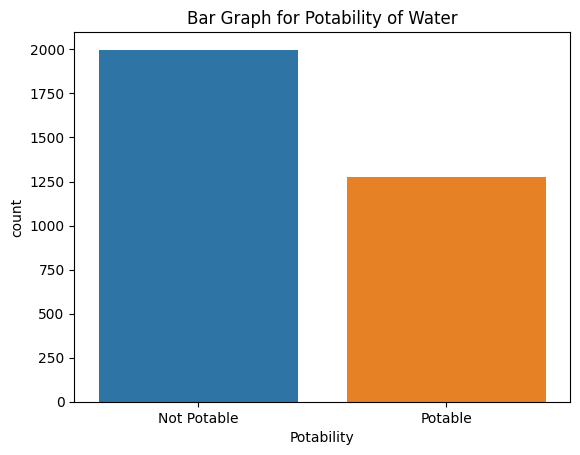

In [ ]:
sns.countplot(x = 'Potability', data = df, saturation = 0.8)
plt.xticks(ticks = [0, 1], labels = ['Not Potable', 'Potable'])
plt.title('Bar Graph for Potability of Water')
plt.show()

# PREPROCESSING : MISSING VALUES

In [ ]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

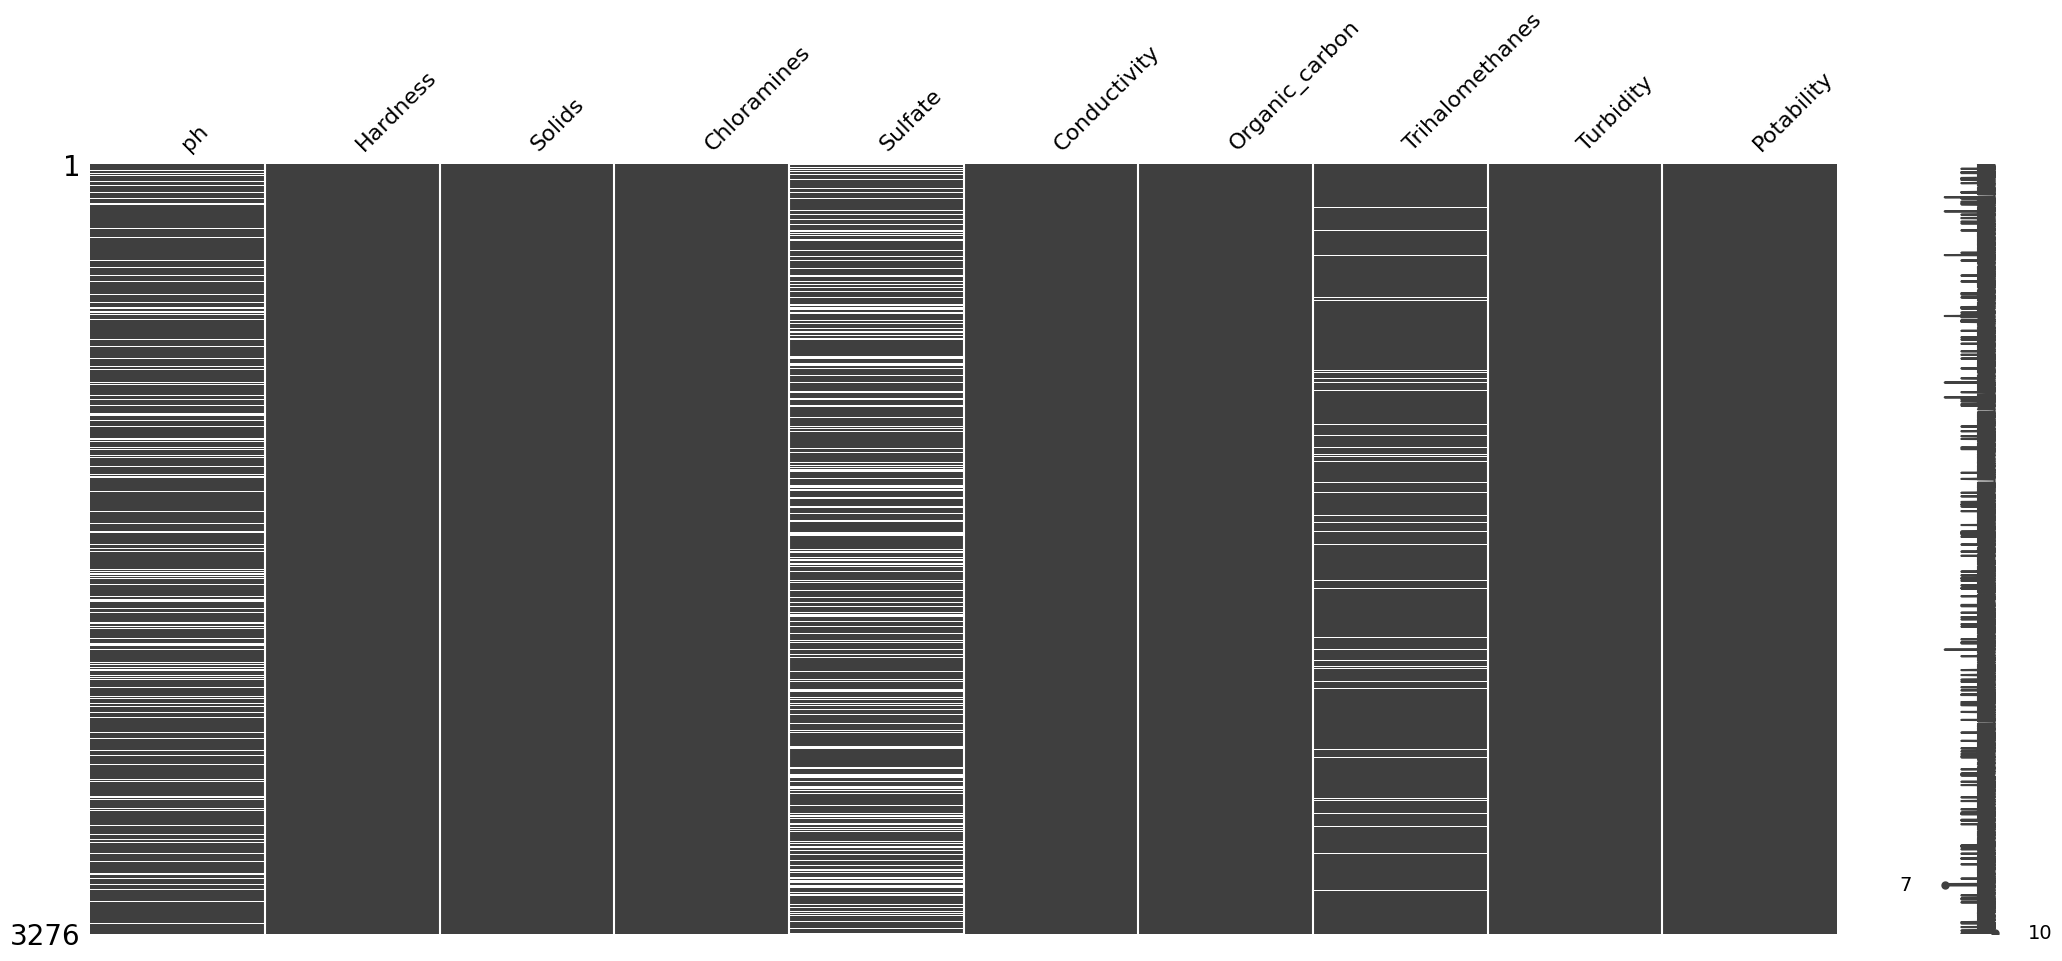

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

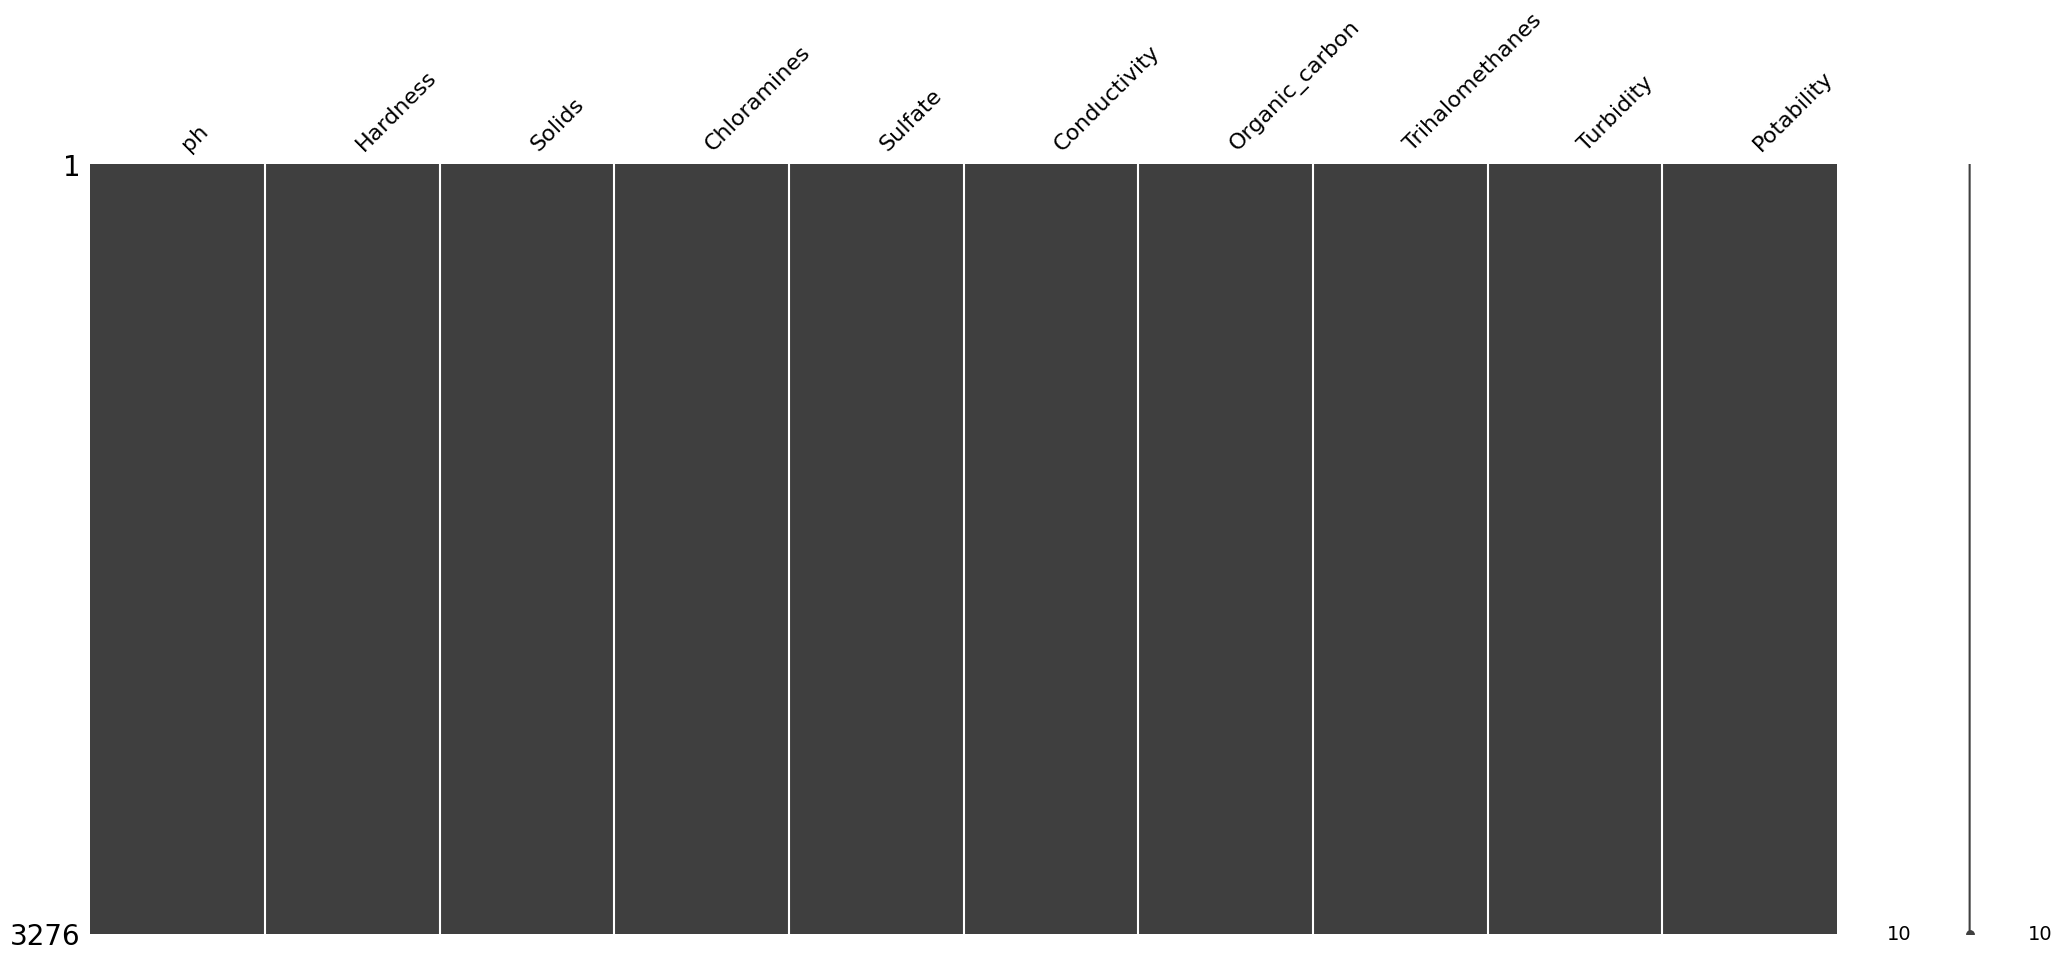

In [ ]:
msno.matrix(df)
plt.show()

# CORRELATION BETWEEN FEATURES

In [ ]:
corr = df.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


<Axes: >

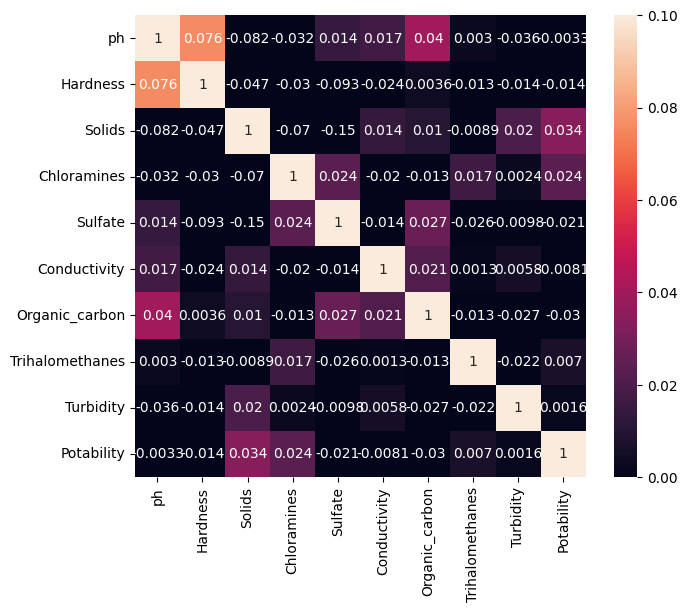

In [ ]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr, annot=True, vmin=0, vmax=0.1)

#VISUALIZATION OF FEATURES

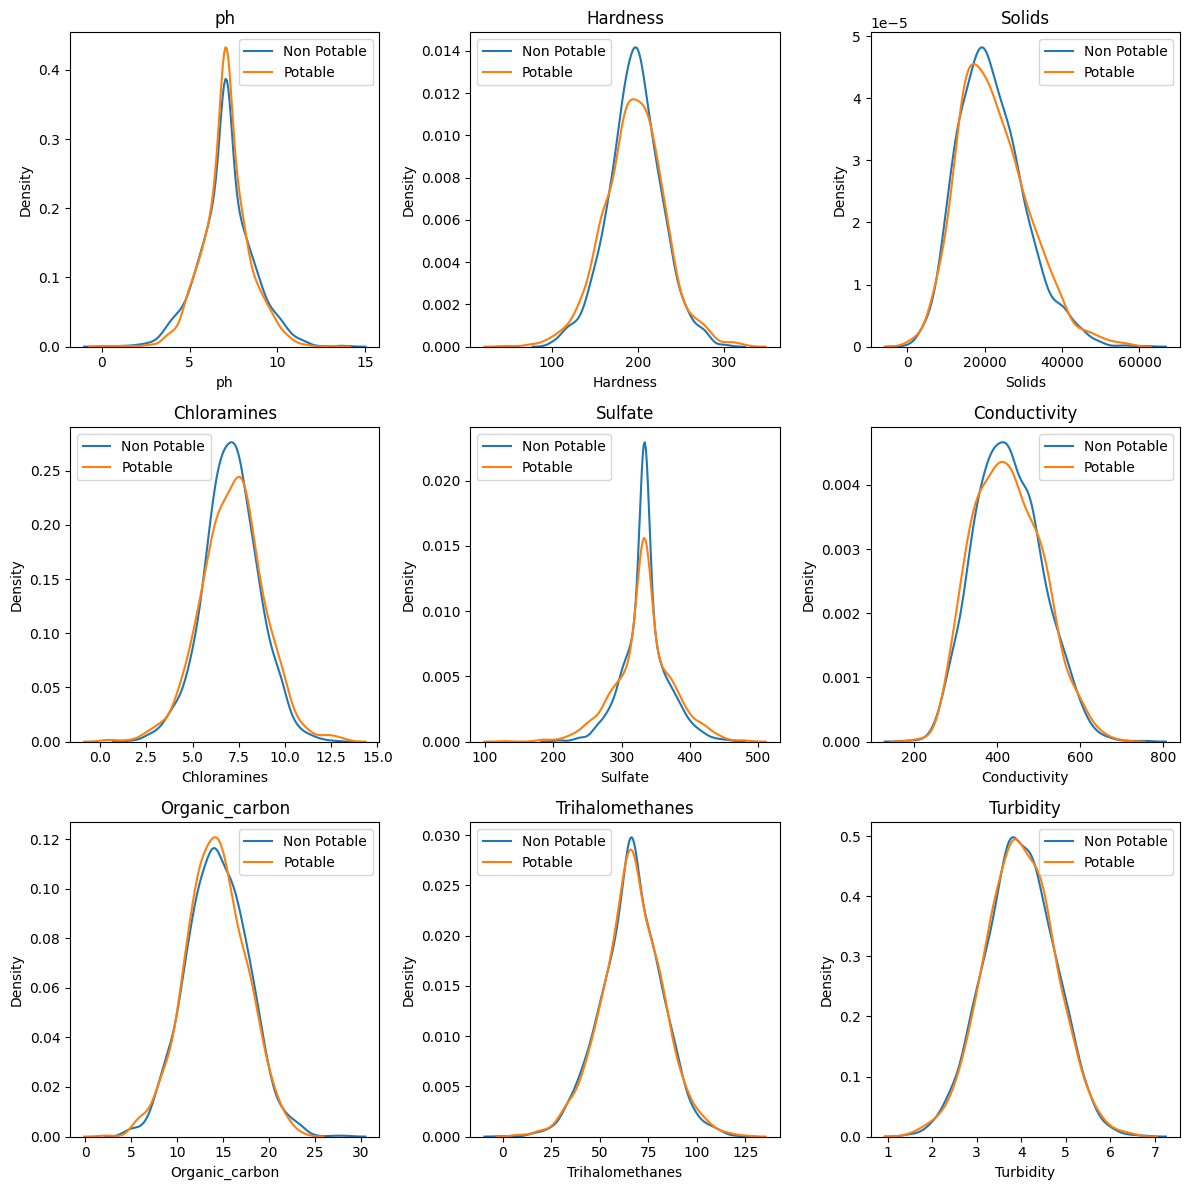

In [ ]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (12,12))
for a, col in  enumerate(df.columns[:9]):
    plt.subplot(3,3, a+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

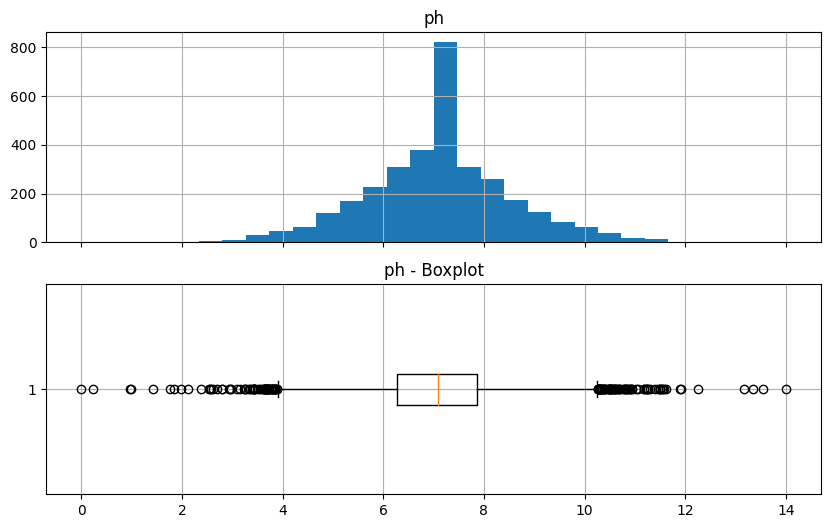

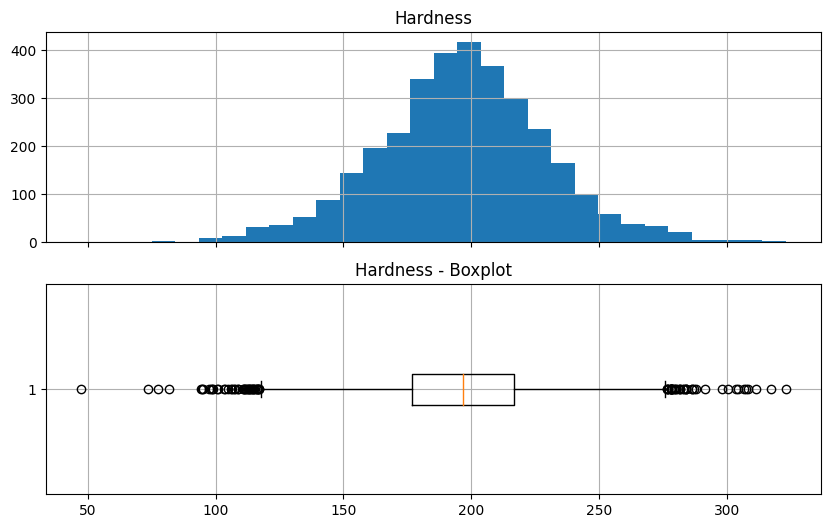

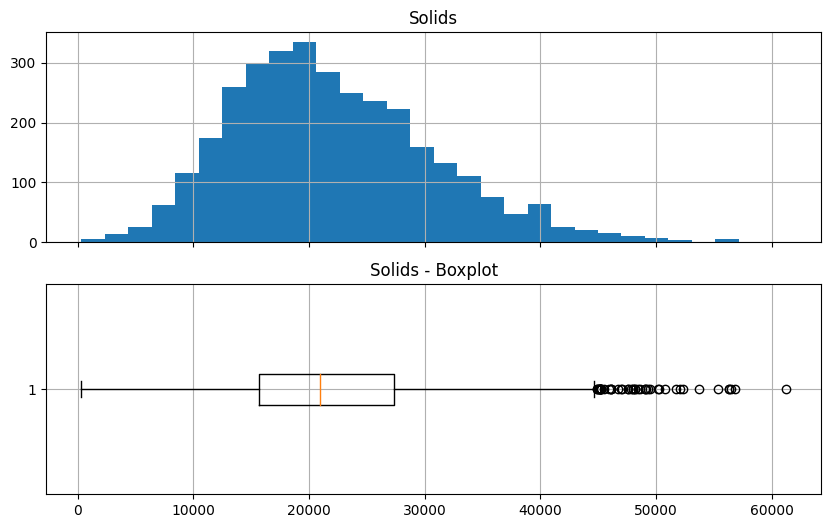

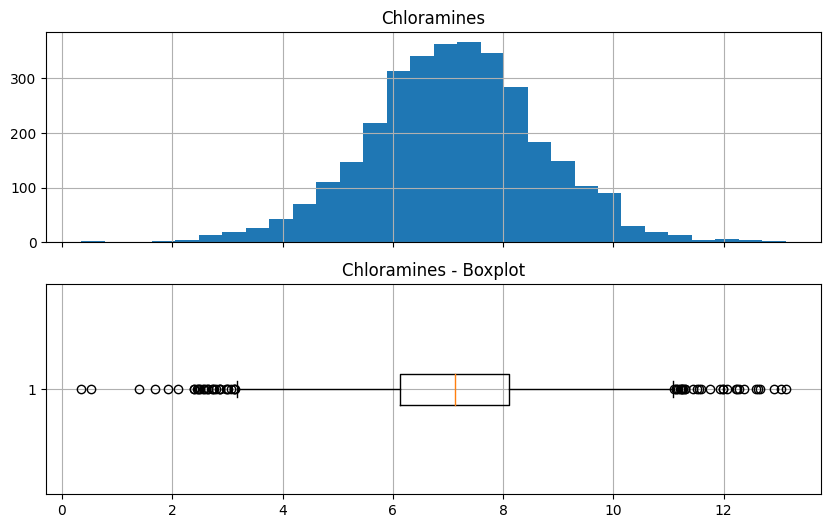

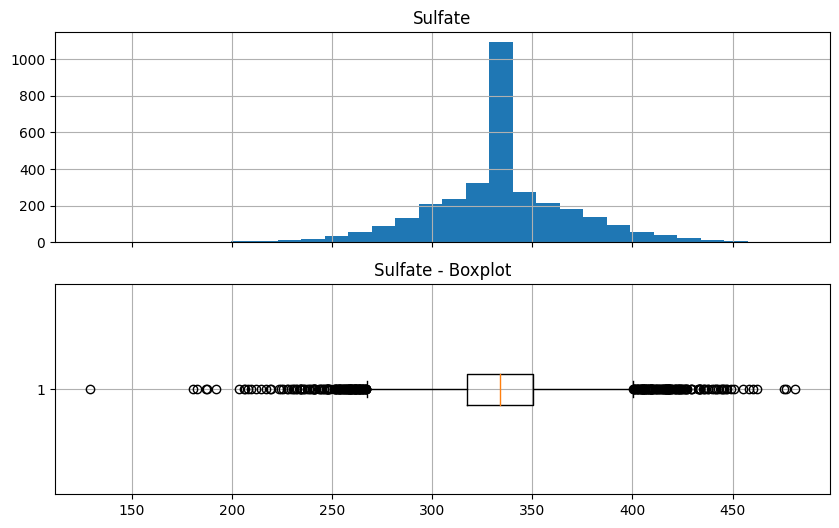

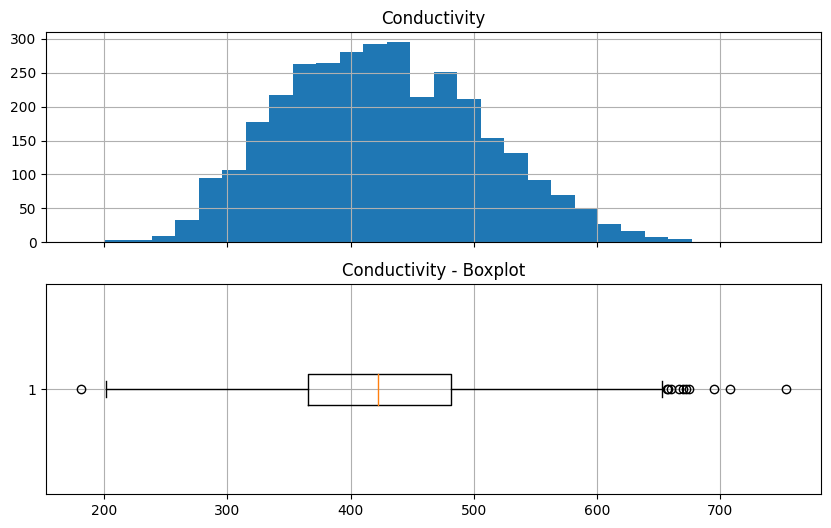

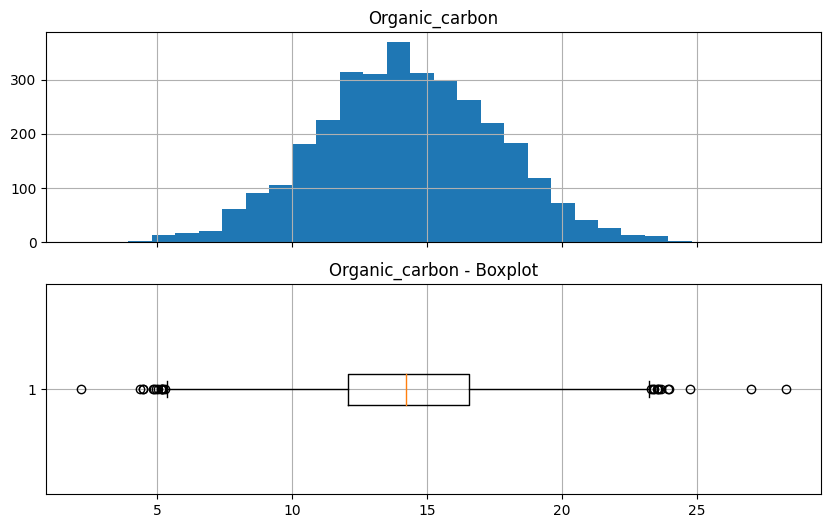

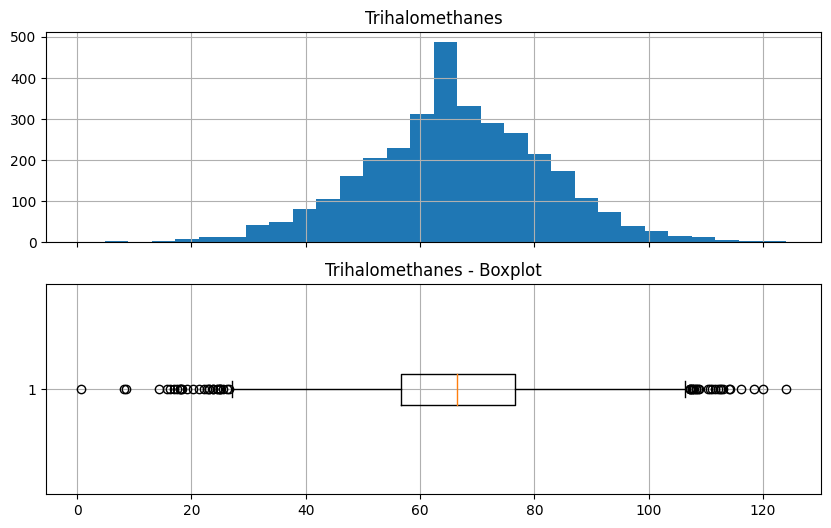

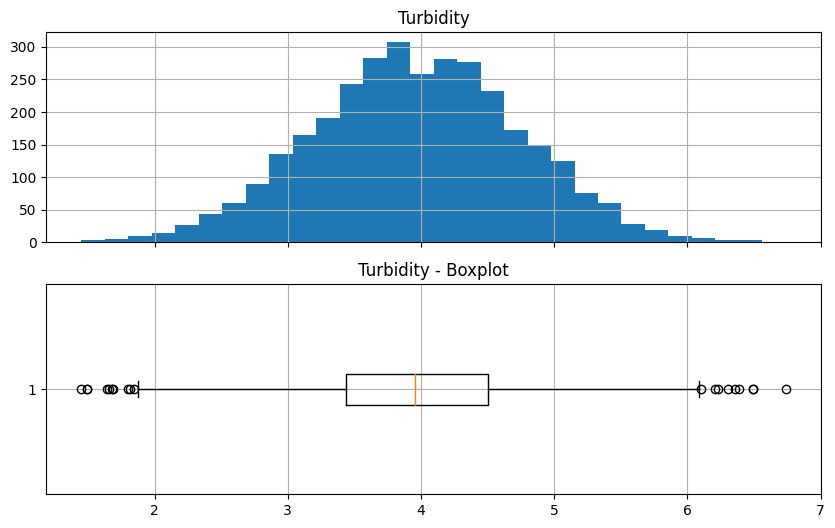

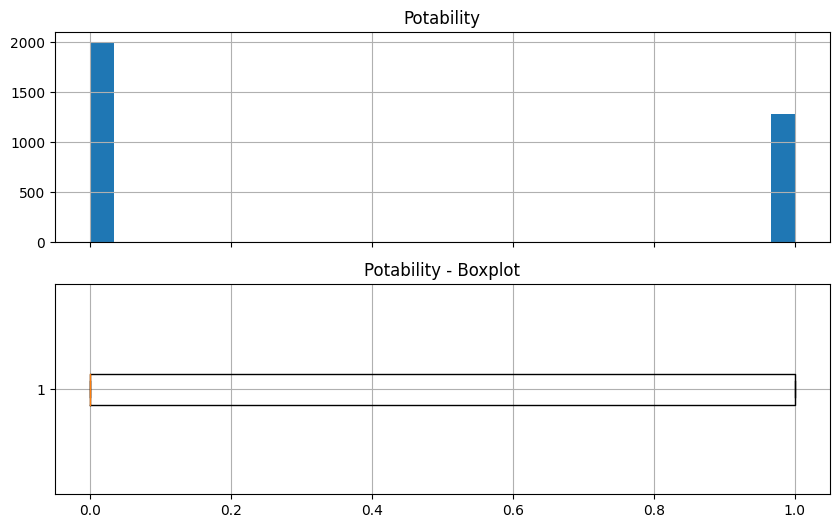

In [ ]:
for f in df.columns:
    fig, (a1, a2) = plt.subplots(2, 1, figsize=(10,6), sharex=True)
    a1.hist(df[f], bins=30)
    a1.grid()
    a1.set_title(f)

    feature_wo_nan = df[~np.isnan(df[f])][f]
    a2.boxplot(feature_wo_nan, vert=False)
    a2.grid()
    a2.set_title(f + ' - Boxplot')
    plt.show()

#PREPROSESSING:TRAIN-TEST-SPLIT

In [ ]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


# PREPROSESSING:NORMALIZATION

In [ ]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

#K-NEAREST NEIGHBOUR CLASSIFIER

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=22)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [ ]:
knn_pred = knn_model.predict(X_test)

In [ ]:
print(list(knn_pred != y_test))

[True, False, True, True, True, False, True, False, False, False, False, True, False, False, False, True, True, True, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, True, True, True, False, True, True, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, True, True, False, False, False, False, True, False, True, False, False, False, True, False, True, False, False, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, 

In [ ]:
np.mean(knn_pred != y_test)

0.3997965412004069

In [ ]:
print(confusion_matrix(y_test, knn_pred))

[[560  28]
 [365  30]]


In [ ]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.61      0.95      0.74       588
           1       0.52      0.08      0.13       395

    accuracy                           0.60       983
   macro avg       0.56      0.51      0.44       983
weighted avg       0.57      0.60      0.50       983



In [ ]:
print("Train Set Accuracy: "+str(accuracy_score(y_train,knn_model.predict(X_train))*100))
print("Test Set Accuracy: "+str(accuracy_score(y_test,knn_model.predict(X_test))*100))

Train Set Accuracy: 62.10204971652856
Test Set Accuracy: 60.020345879959315


In [ ]:
error = []
for i in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error.append(np.mean(pred != y_test))

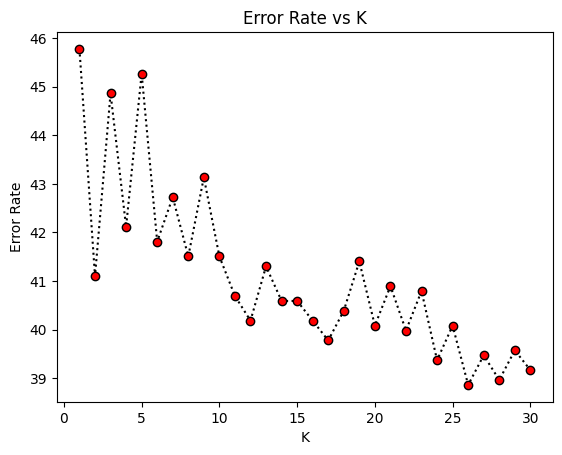

In [ ]:
plt.plot(range(1, 31), np.array(error) * 100, color='k', ls=':', marker='o', markerfacecolor='r')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#LOGISTIC REGRESSION


In [ ]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
log_pred = log_model.predict(X_test)

In [ ]:
print(list(log_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(list(y_test))

[1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 

In [ ]:
print(confusion_matrix(y_test, log_pred))

[[588   0]
 [395   0]]


In [ ]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       588
           1       0.00      0.00      0.00       395

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.36      0.60      0.45       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print("Train Set Accuracy :"+str(accuracy_score(y_train,log_model.predict(X_train))*100))
print("Test Set Accuracy :"+str(accuracy_score(y_test,log_model.predict(X_test))*100))

Train Set Accuracy :61.49149585695596
Test Set Accuracy :59.81688708036622


#DECISION TREE

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)

In [ ]:
print(list(pred_dt != y_test))

[True, False, True, True, True, False, True, False, False, False, False, True, False, False, True, True, True, True, True, False, False, False, True, False, False, True, True, False, False, False, True, False, True, False, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, True, True, False, False, False, True, True, True, False, True, True, False, True, False, False, True, False, True, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, False, True, True, False, False, False, False, True, False, False, False, True, False, True, False, False, False, True, False, False, True, False, False, True, False, False, True, True, True, True, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False

In [ ]:
np.mean(pred_dt != y_test)

0.3621566632756867

In [ ]:
print(confusion_matrix(y_test, pred_dt))

[[524  64]
 [292 103]]


In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75       588
           1       0.62      0.26      0.37       395

    accuracy                           0.64       983
   macro avg       0.63      0.58      0.56       983
weighted avg       0.63      0.64      0.59       983



In [ ]:
dt = accuracy_score(y_test, pred_dt)
print(dt*100)

63.78433367243134


**VISUALIZING DECISION TREE**

In [ ]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

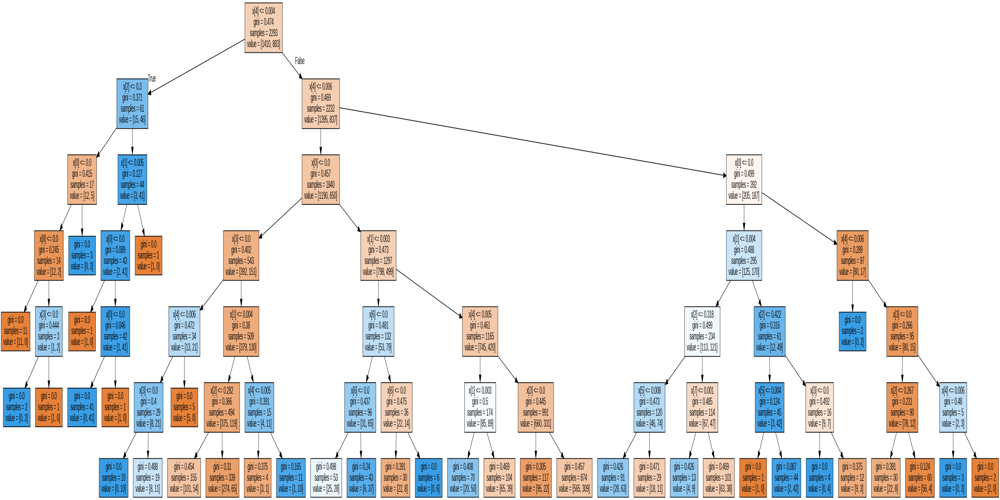

In [ ]:
from PIL import Image

image = Image.open('decision_tree_graphivz.png')
new_image = image.resize((1000, 500))
new_image.show()

# RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

In [ ]:
print(list(pred_rf != y_test))

[True, False, True, False, False, False, True, False, False, False, False, True, False, False, True, True, True, True, True, False, False, False, True, False, False, False, True, True, False, True, True, False, True, False, False, True, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, False, False, False, True, False, False, False, False, False, False

In [ ]:
np.mean(pred_rf != y_test)

0.35300101729399797

In [ ]:
print(confusion_matrix(y_test, pred_rf))

[[516  72]
 [275 120]]


In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       588
           1       0.62      0.30      0.41       395

    accuracy                           0.65       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.64      0.65      0.61       983



In [ ]:
rf = accuracy_score(y_test, pred_rf)
print(rf*100)

64.6998982706002


# SUPPORT VECTOR MACHINE

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

In [ ]:
print(list(svc_pred != y_test))

[True, False, True, True, True, False, True, True, False, False, False, True, False, False, True, True, True, True, True, True, False, False, True, False, False, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, True, True, False, True, True, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, True, True, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, True, False, True, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, F

In [ ]:
np.mean(svc_pred != y_test)

0.40183112919633773

In [ ]:
print(confusion_matrix(y_test, svc_pred))

[[588   0]
 [395   0]]


In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       588
           1       0.00      0.00      0.00       395

    accuracy                           0.60       983
   macro avg       0.30      0.50      0.37       983
weighted avg       0.36      0.60      0.45       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
rf = accuracy_score(y_test, svc_pred)
print(rf*100)

59.81688708036622
